In [ ]:
import zipfile
import os

# Define the path to the zip file
zip_file_path = '/content/tiles.zip'

# Define the directory to extract to (current directory)
extract_dir = '/content/' # Changed to extract into the current directory

# Create the extraction directory if it doesn't exist (not needed if extracting to /content which always exists)
# os.makedirs(extract_dir, exist_ok=True) # Removed as /content always exists

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir) # Extracting directly to /content

print(f"'{zip_file_path}' unzipped to '{extract_dir}' successfully.")

# List the contents of the extracted directory to confirm
print("\nContents of the extracted directory:")
for item in os.listdir(extract_dir):
    print(item)

'/content/tiles.zip' unzipped to '/content/' successfully.

Contents of the extracted directory:
.config
tiles
tiles.zip
sample_data


In [ ]:
import os

# Define the path to the tiles folder
tiles_folder_path = '/content/tiles'

# List the contents of the tiles folder
print(f"Contents of '{tiles_folder_path}':")
for item in os.listdir(tiles_folder_path):
    print(item)

Contents of '/content/tiles':
tile_827.png
tile_1010.png
tile_1354.png
tile_1284.png
tile_1218.png
tile_1566.png
tile_1274.png
tile_495.png
tile_1151.png
tile_1633.png
tile_8.png
tile_954.png
tile_1011.png
tile_1410.png
tile_1149.png
tile_1576.png
tile_59.png
tile_1241.png
tile_1447.png
tile_763.png
tile_1499.png
tile_1238.png
tile_713.png
tile_1451.png
tile_231.png
tile_1320.png
tile_376.png
tile_641.png
tile_594.png
tile_1090.png
tile_658.png
tile_69.png
tile_371.png
tile_1036.png
tile_1137.png
tile_669.png
tile_182.png
tile_1442.png
tile_764.png
tile_1560.png
tile_604.png
tile_94.png
tile_946.png
tile_1124.png
tile_1653.png
tile_1646.png
tile_749.png
tile_688.png
tile_1605.png
tile_828.png
tile_1709.png
tile_1009.png
tile_1517.png
tile_355.png
tile_287.png
tile_130.png
tile_1551.png
tile_1344.png
tile_149.png
tile_908.png
tile_1652.png
tile_101.png
tile_912.png
tile_818.png
tile_745.png
tile_406.png
tile_1307.png
tile_849.png
tile_1051.png
tile_349.png
tile_1614.png
tile_1691.png
ti

# Task
Map the image files in the "tiles" folder to their corresponding mask image files in the "tiles/model_outputs/auto_masks" folder based on the naming convention where a tile image named "tile_X.png" maps to a mask image named "tile_X_mask.png".

## Define paths

### Subtask:
Define the paths to the `tiles` folder and the `tiles/model_outputs/auto_masks` folder.


**Reasoning**:
The subtask requires defining two string variables for the paths to the tiles and masks folders. This can be done in a single code block.



In [ ]:
tiles_folder_path = '/content/tiles'
masks_folder_path = '/content/tiles/model_outputs/auto_masks'

# Task
Map image files in the directory "/content/tiles" to corresponding mask files in the directory "/content/tiles/model_outputs/auto_masks", where the mask file for "tiles_X.png" is named "tiles_X_masks.png".

## List files

### Subtask:
Get a list of all image files in the `tiles_folder_path`.


**Reasoning**:
List all files in the tiles folder and filter for PNG files.



In [ ]:
import os

tile_image_files = [f for f in os.listdir(tiles_folder_path) if f.endswith('.png')]
print(f"Found {len(tile_image_files)} tile image files.")

Found 1764 tile image files.


## Map files

### Subtask:
Iterate through the list of tile image files and create a dictionary mapping each tile image path to its corresponding mask image path based on the naming convention.


**Reasoning**:
Initialize the dictionary and iterate through the tile image files to create the mapping.



In [ ]:
image_mask_mapping = {}

for tile_filename in tile_image_files:
    # Construct the expected mask filename
    mask_filename = tile_filename.replace('.png', '_mask.png')

    # Construct full paths
    tile_image_path = os.path.join(tiles_folder_path, tile_filename)
    mask_image_path = os.path.join(masks_folder_path, mask_filename)

    # Add to the mapping dictionary
    image_mask_mapping[tile_image_path] = mask_image_path

print(f"Created mapping for {len(image_mask_mapping)} image files.")

Created mapping for 1764 image files.


## Verify mapping

### Subtask:
Check if the corresponding mask file exists for each tile image in the `masks_folder_path` and update the mapping dictionary accordingly (e.g., remove entries where the mask file doesn't exist).


**Reasoning**:
The subtask requires iterating through the existing mapping, checking for the existence of the mask file for each entry, and creating a new dictionary with only the valid mappings. This can be achieved in a single code block by iterating through the `image_mask_mapping` dictionary and using `os.path.exists` to verify the mask file path before adding it to a new dictionary. Finally, replace the original dictionary and print the count of the valid mappings.



In [ ]:
import os

verified_image_mask_mapping = {}

for tile_image_path, mask_image_path in image_mask_mapping.items():
    if os.path.exists(mask_image_path):
        verified_image_mask_mapping[tile_image_path] = mask_image_path

image_mask_mapping = verified_image_mask_mapping

print(f"Number of verified image-mask mappings: {len(image_mask_mapping)}")

Number of verified image-mask mappings: 1764


## Summary:

### Data Analysis Key Findings
*   Initially, 1764 tile image files were found in the specified directory.
*   A mapping was created for all 1764 tile image files to their expected mask file paths based on the naming convention.
*   After verifying the existence of the corresponding mask files, all 1764 mapped mask files were found to exist.

### Insights or Next Steps
*   The dataset appears to be complete, with every tile image having a corresponding mask file.
*   The verified `image_mask_mapping` can now be used for further processing, such as loading and analyzing the image and mask pairs.


# Task
Build and train a LinkNet model for image segmentation using the image tiles in "/content/tiles" and their corresponding masks in "/content/tiles/model_outputs/auto_masks". Divide the dataset into training and validation sets.

## Install necessary libraries

### Subtask:
Install libraries like `tensorflow` or `pytorch`, and segmentation models if not already installed.


**Reasoning**:
Install the necessary libraries for building and training the segmentation model.



In [ ]:
!pip install tensorflow segmentation_models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.7 MB/s eta 0:00:00


## Prepare data for model

### Subtask:
Create a data generator or a custom dataset class to load and preprocess the image and mask pairs for training and validation.


**Reasoning**:
The subtask is to create a custom data generator for loading and preprocessing image and mask pairs. This requires defining image dimensions, creating a list of image and mask paths, splitting them into training and validation sets, and implementing a custom data generator class that handles loading, resizing, and normalization. These steps can be grouped into a single code block.



In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split

# Define image dimensions
IMG_HEIGHT = 256
IMG_WIDTH = 256

# Create a list of image and mask file paths
image_paths = list(image_mask_mapping.keys())
mask_paths = list(image_mask_mapping.values())

# Split data into training and validation sets
train_image_paths, val_image_paths, train_mask_paths, val_mask_paths = train_test_split(
    image_paths, mask_paths, test_size=0.2, random_state=42
)

class ImageMaskGenerator(tf.keras.utils.Sequence):
    """Custom data generator for image and mask pairs."""

    def __init__(self, image_filenames, mask_filenames, batch_size, img_height, img_width, **kwargs):
        super().__init__(**kwargs) # Added to address the warning
        self.image_filenames = image_filenames
        self.mask_filenames = mask_filenames
        self.batch_size = batch_size
        self.img_height = img_height
        self.img_width = img_width
        self.on_epoch_end()

    def __len__(self):
        return len(self.image_filenames) // self.batch_size

    def __getitem__(self, index):
        batch_image_filenames = self.image_filenames[index * self.batch_size:(index + 1) * self.batch_size]
        batch_mask_filenames = self.mask_filenames[index * self.batch_size:(index + 1) * self.batch_size]

        batch_images = []
        batch_masks = []

        for image_filename, mask_filename in zip(batch_image_filenames, batch_mask_filenames):
            # Read image and mask
            img = cv2.imread(image_filename, cv2.IMREAD_COLOR)
            mask = cv2.imread(mask_filename, cv2.IMREAD_GRAYSCALE) # Masks are typically grayscale

            # Resize
            img = cv2.resize(img, (self.img_width, self.img_height))
            mask = cv2.resize(mask, (self.img_width, self.img_height))

            # Normalize image (assuming values are 0-255)
            img = img / 255.0

            # Normalize mask to be binary (0 or 1)
            mask = np.expand_dims(mask, axis=-1) # Add channel dimension
            mask = (mask > 0).astype(np.float32) # Convert to binary mask

            batch_images.append(img)
            batch_masks.append(mask)

        return np.array(batch_images), np.array(batch_masks)

    def on_epoch_end(self):
        # Shuffle data after each epoch
        combined = list(zip(self.image_filenames, self.mask_filenames))
        np.random.shuffle(combined)
        self.image_filenames, self.mask_filenames = zip(*combined)

# Instantiate data generators
batch_size = 16
train_generator = ImageMaskGenerator(train_image_paths, train_mask_paths, batch_size, IMG_HEIGHT, IMG_WIDTH)
val_generator = ImageMaskGenerator(val_image_paths, val_mask_paths, batch_size, IMG_HEIGHT, IMG_WIDTH)

print(f"Training samples: {len(train_image_paths)}")
print(f"Validation samples: {len(val_image_paths)}")
print(f"Training batches per epoch: {len(train_generator)}")
print(f"Validation batches per epoch: {len(val_generator)}")

Training samples: 1411
Validation samples: 353
Training batches per epoch: 88
Validation batches per epoch: 22


## Define linknet model

### Subtask:
Define the architecture of the LinkNet model.


**Reasoning**:
Define the LinkNet model architecture using the segmentation_models library with the specified input shape and output classes.



**Reasoning**:
The error `AttributeError: module 'segmentation_models' has no attribute 'LinkNet'` indicates that `LinkNet` is not directly available under the `segmentation_models` top-level module in the installed version. It's likely located within a sub-module. Checking the `segmentation_models` documentation, LinkNet is usually available under `segmentation_models.Linknet`. Let's try importing and instantiating the model using this corrected path.



In [ ]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras" # Ensure framework is set before importing sm

import segmentation_models as sm

# Define the input shape
input_shape = (IMG_HEIGHT, IMG_WIDTH, 3) # 3 channels for color images

# Define the number of output classes for binary segmentation
n_classes = 1

# Instantiate the LinkNet model from the correct path
model = sm.Linknet(input_shape=input_shape, classes=n_classes, activation='sigmoid')

model.summary()

Segmentation Models: using `tf.keras` framework.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 256, 256,  │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 128, 128,  │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 128, 128,  │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 128, 128,  │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 64, 64,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 64, 64,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 64, 64,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 64, 64,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 32, 32,    │          0 │ block3_conv3[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 32, 32,    │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 32, 32,    │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 32, 32,    │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 16, 16,    │          0 │ block4_conv3[0][… │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv1        │ (None, 16, 16,    │  2,359,808 │ block4_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv2        │ (None, 16, 16,    │  2,359,808 │ block5_conv1[0][

 Total params: 20,325,137 (77.53 MB)

 Trainable params: 20,318,321 (77.51 MB)

 Non-trainable params: 6,816 (26.62 KB)

## Compile the model

### Subtask:
Configure the model for training by specifying the optimizer, loss function, and metrics.


**Reasoning**:
Configure the model for training by specifying the optimizer, loss function, and metrics using the imported components and then compile the model.



In [ ]:
from tensorflow.keras.optimizers import Adam
import segmentation_models as sm

# Define optimizer, loss function, and metrics
optimizer = Adam(learning_rate=0.001) # Example learning rate
loss = sm.losses.bce_jaccard_loss # Common segmentation loss
metrics = [sm.metrics.iou_score] # IoU as a metric

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

print("Model compiled successfully.")

Model compiled successfully.


## Train the model

### Subtask:
Train the model using the prepared training data and validate it using the validation data.


**Reasoning**:
Train the compiled model using the fit method with the training and validation data generators, specifying the number of epochs and storing the training history.



In [ ]:
epochs = 10  # Example number of epochs
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

print("Model training completed.")

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 125s 617ms/step - iou_score: 0.6421 - loss: 0.7176 - val_iou_score: 0.7881 - val_loss: 0.5381
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 42s 477ms/step - iou_score: 0.7798 - loss: 0.4487 - val_iou_score: 0.6881 - val_loss: 0.7235
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 42s 474ms/step - iou_score: 0.8116 - loss: 0.3915 - val_iou_score: 0.7845 - val_loss: 0.5546
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 42s 474ms/step - iou_score: 0.8151 - loss: 0.3861 - val_iou_score: 0.6713 - val_loss: 1.3248
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 44s 497ms/step - iou_score: 0.8369 - loss: 0.3381 - val_iou_score: 0.5092 - val_loss: 1.2549
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 42s 473ms/step - iou_score: 0.8265 - loss: 0.3643 - val_iou_score: 0.7956 - val_loss: 0.4349
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 42s 473ms/step - iou_score: 0.8327 - loss: 0.3519 - val_iou_score: 0.8068 - val_loss: 0.4405
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 471ms/step - iou_score: 0.8336 - loss: 0

# Task
Visualize the training and validation loss and IoU score from the model training history using graphs.

## Extract history data

### Subtask:
Access the training and validation loss and metric values from the `history` object returned by the `model.fit()` method.


**Reasoning**:
Access the training and validation loss and metric values from the history object and store them in separate variables as instructed.



In [ ]:
# Access training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Access training and validation IoU score
train_iou = history.history['iou_score']
val_iou = history.history['val_iou_score']

print("Training and validation metrics accessed from history.")

Training and validation metrics accessed from history.


## Plot training history

### Subtask:
Use a plotting library (e.g., Matplotlib) to create plots showing the training and validation loss over epochs, and the training and validation metric (IoU score) over epochs.


**Reasoning**:
Plot the training and validation loss and IoU scores over epochs using matplotlib.



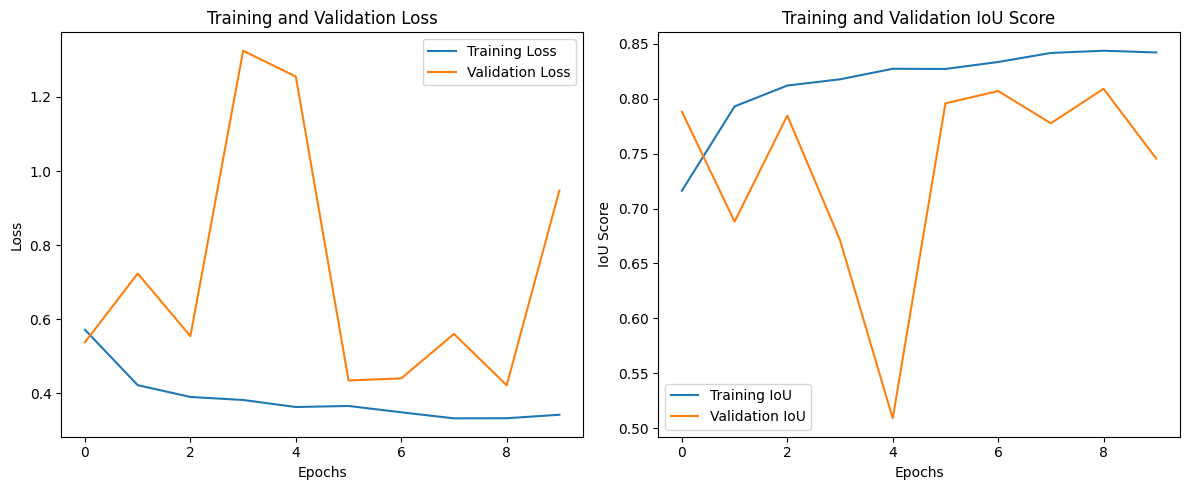

In [ ]:
import matplotlib.pyplot as plt

epochs_range = range(epochs)

plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation IoU score
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_iou, label='Training IoU')
plt.plot(epochs_range, val_iou, label='Validation IoU')
plt.title('Training and Validation IoU Score')
plt.xlabel('Epochs')
plt.ylabel('IoU Score')
plt.legend()

plt.tight_layout()
plt.show()

## Add labels and title

### Subtask:
Add appropriate labels to the x and y axes and a title to each plot for clarity.


## Display plots

### Subtask:
Display the generated plots.


**Reasoning**:
Display the generated plots using `plt.show()`.



## Summary:

### Data Analysis Key Findings

*   Training and validation loss and IoU score metrics were successfully extracted from the `history` object.
*   Two plots were generated: one visualizing training and validation loss over epochs and another showing training and validation IoU score over epochs.
*   The plots included appropriate titles, axis labels, and legends for clarity.

### Insights or Next Steps

*   Analyze the trends in the plots to assess model performance and identify potential issues like overfitting or underfitting.
*   Consider further model tuning or data augmentation based on the visualized training history.


# Task
Visualize the model's predictions on a few sample images from the validation set, showing the original image, the ground truth mask, and the predicted mask.

## Select sample images

### Subtask:
Choose a few image and mask pairs from the validation set to visualize.


**Reasoning**:
Select a small number of random indices from the validation set and use them to get the corresponding image and mask paths.



In [ ]:
import numpy as np

# Choose a few random indices from the validation set
num_samples = 5
random_indices = np.random.choice(len(val_image_paths), num_samples, replace=False)

# Select the corresponding image and mask paths
sample_image_paths = [val_image_paths[i] for i in random_indices]
sample_mask_paths = [val_mask_paths[i] for i in random_indices]

print(f"Selected {num_samples} random samples from the validation set.")

Selected 5 random samples from the validation set.


## Get model predictions

### Subtask:
Use the trained model to predict the mask for each selected sample image.


**Reasoning**:
Load and preprocess the sample images and masks, predict masks using the trained model, and store the results.



In [ ]:
import cv2
import numpy as np

# Create empty lists to store loaded data and predictions
sample_images = []
sample_ground_truth_masks = []

# Iterate through the sample image and mask paths
for image_filename, mask_filename in zip(sample_image_paths, sample_mask_paths):
    # Read image and mask
    img = cv2.imread(image_filename, cv2.IMREAD_COLOR)
    mask = cv2.imread(mask_filename, cv2.IMREAD_GRAYSCALE) # Masks are typically grayscale

    # Resize
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    mask = cv2.resize(mask, (IMG_WIDTH, IMG_HEIGHT))

    # Preprocess image (assuming values are 0-255)
    img = img / 255.0

    # Preprocess mask to be binary (0 or 1) and add channel dimension
    mask = np.expand_dims(mask, axis=-1) # Add channel dimension
    mask = (mask > 0).astype(np.float32) # Convert to binary mask

    sample_images.append(img)
    sample_ground_truth_masks.append(mask)

# Convert the list of images into a NumPy array with batch dimension
sample_images_array = np.array(sample_images)

# Use the trained model to predict the masks
predicted_masks = model.predict(sample_images_array)

# Squeeze the predicted masks to remove the extra dimension
predicted_masks = np.squeeze(predicted_masks, axis=-1)

# Convert the list of ground truth masks into a NumPy array
sample_ground_truth_masks_array = np.array(sample_ground_truth_masks)


print(f"Processed {len(sample_images)} sample images and generated predictions.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Processed 5 sample images and generated predictions.


## Visualize results

### Subtask:
Display the original image, the ground truth mask, and the predicted mask for each sample side by side.


**Reasoning**:
Display the original image, ground truth mask, and predicted mask side by side for each sample using matplotlib.



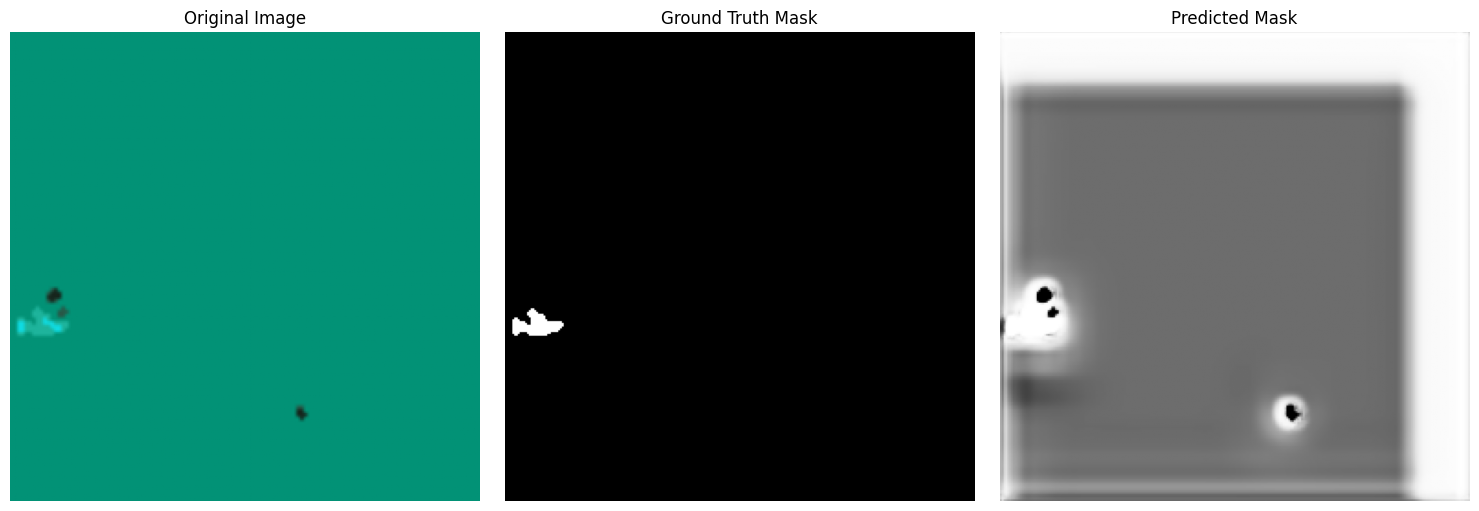

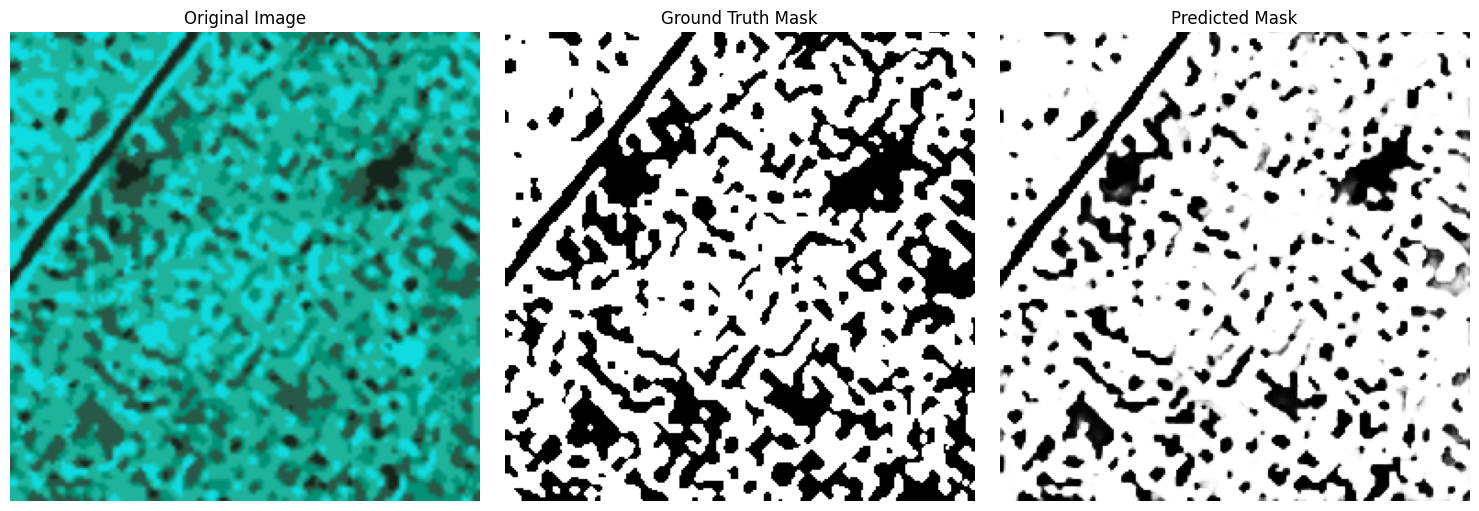

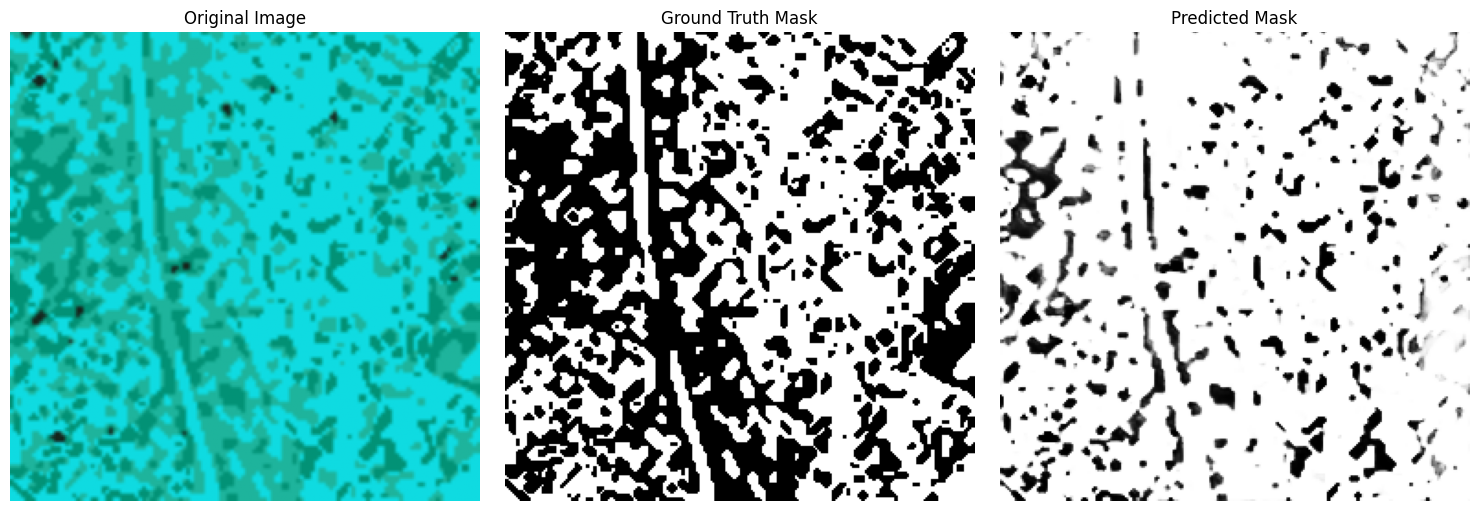

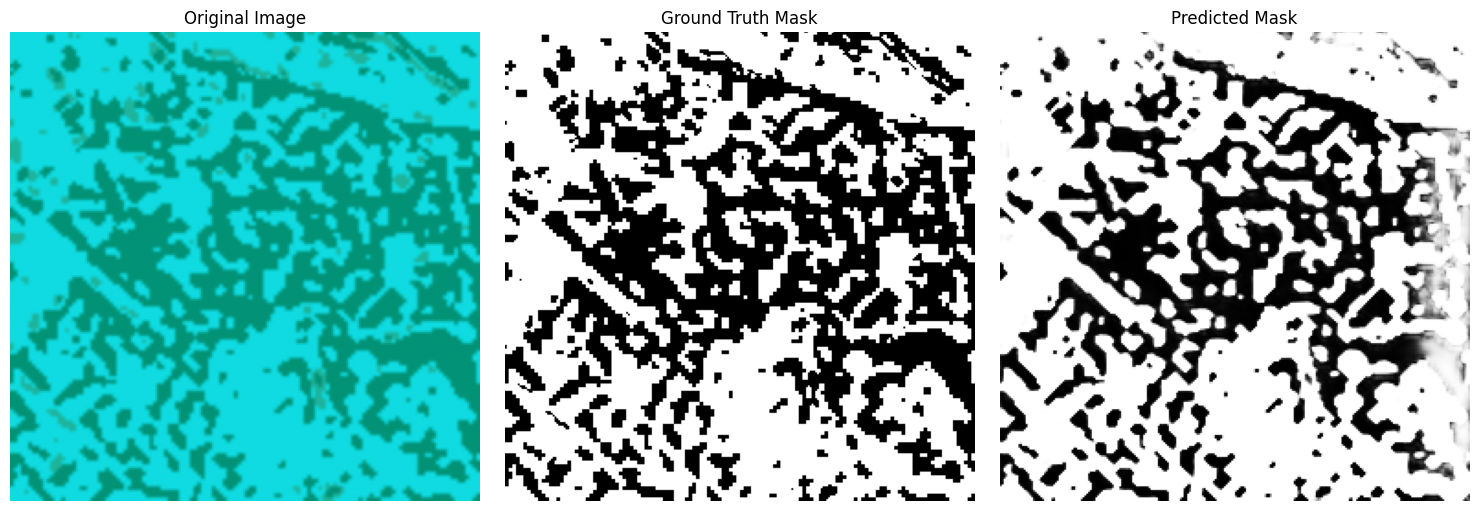

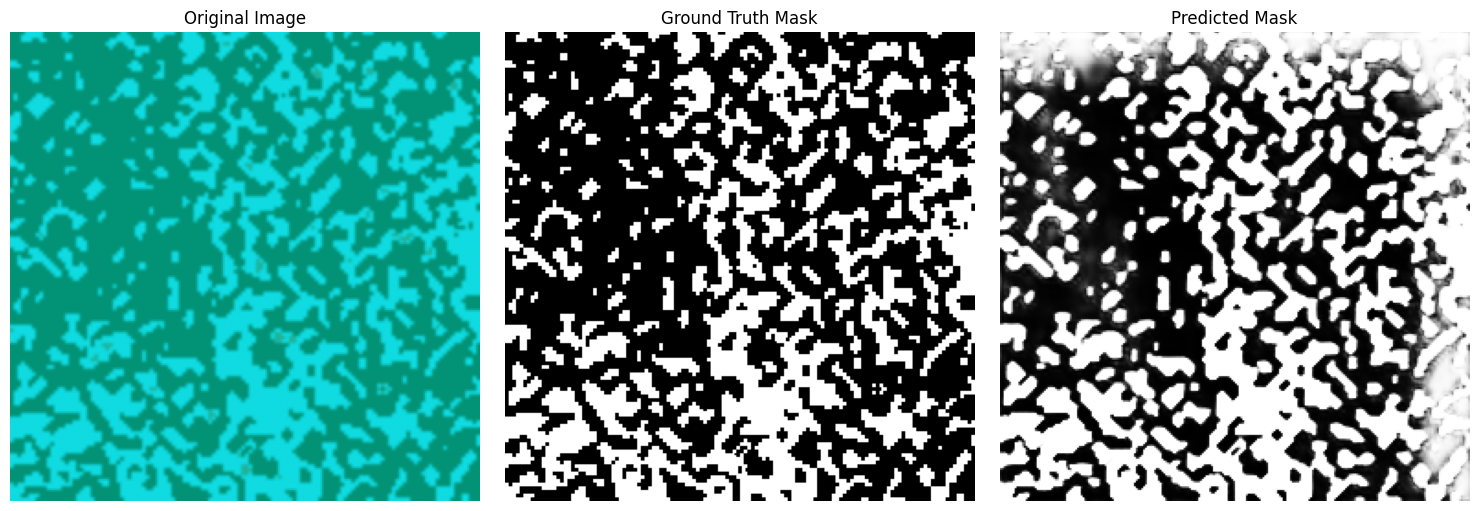

In [ ]:
import matplotlib.pyplot as plt

for i in range(num_samples):
    plt.figure(figsize=(15, 5))

    # Display original image
    plt.subplot(1, 3, 1)
    plt.imshow(sample_images[i])
    plt.title('Original Image')
    plt.axis('off')

    # Display ground truth mask
    plt.subplot(1, 3, 2)
    plt.imshow(sample_ground_truth_masks[i], cmap='gray')
    plt.title('Ground Truth Mask')
    plt.axis('off')

    # Display predicted mask
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_masks[i], cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

## Add titles and labels

### Subtask:
Add titles and labels


**Reasoning**:
Add appropriate titles to each image and the overall plot for clarity.



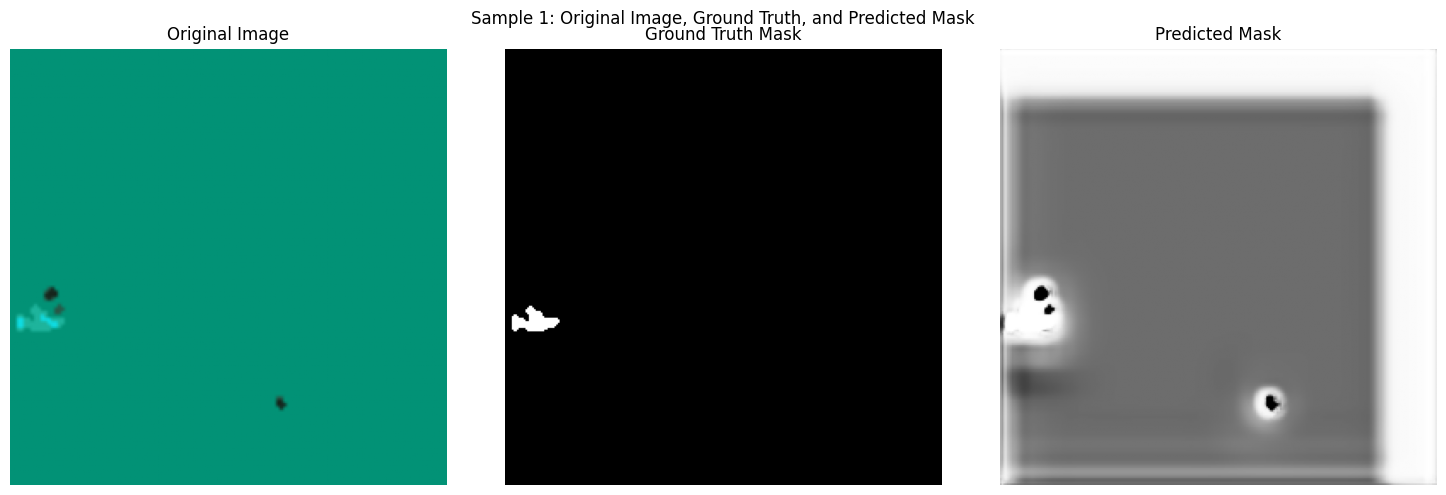

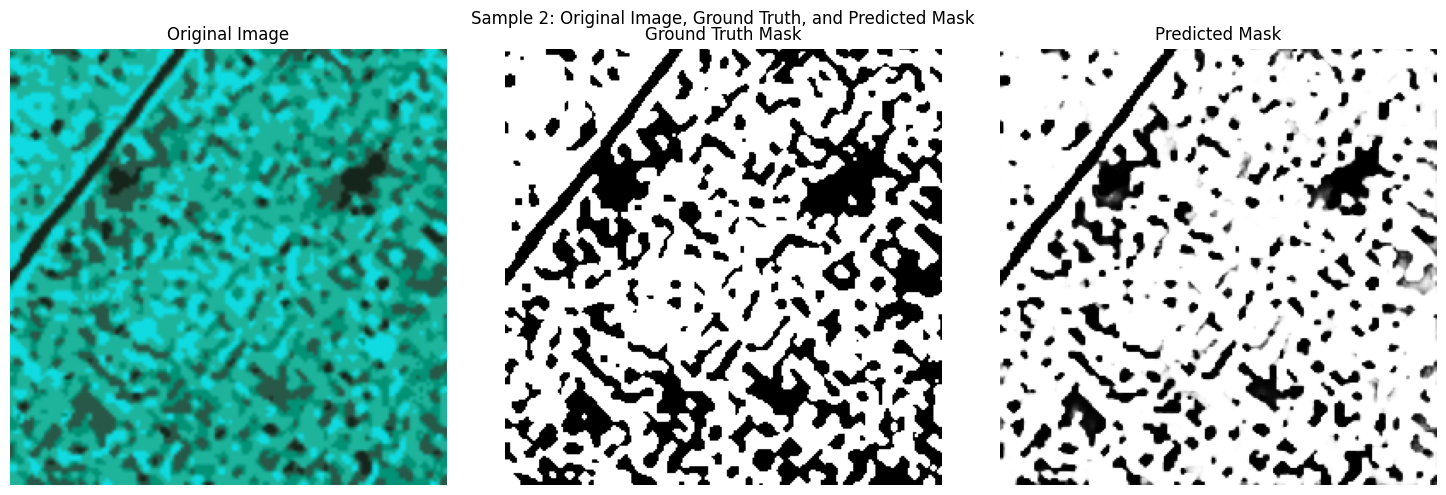

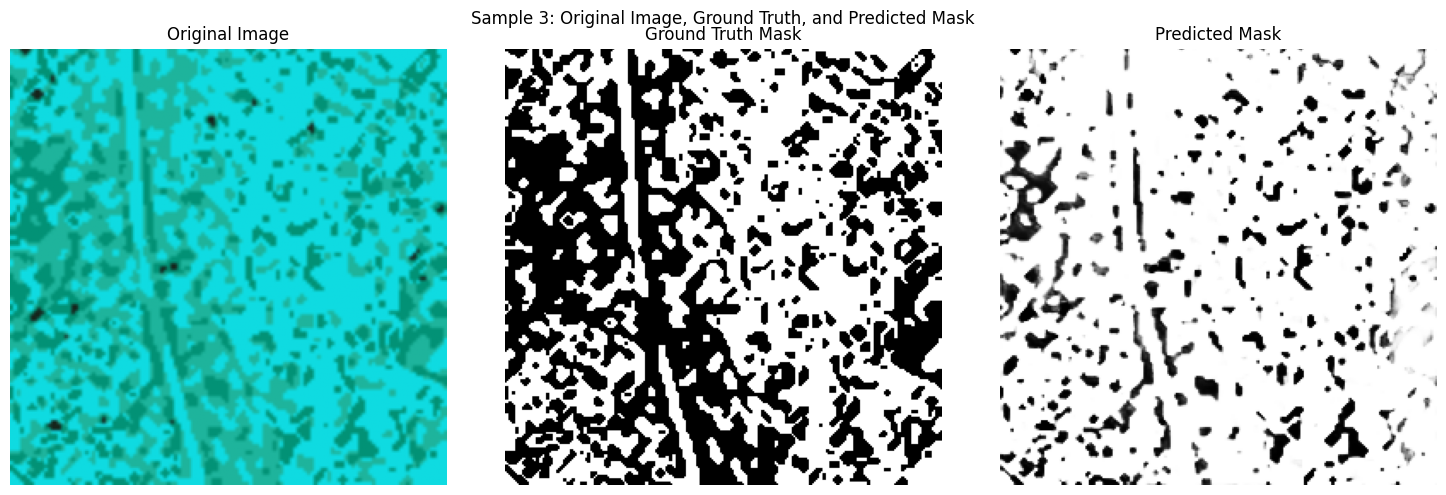

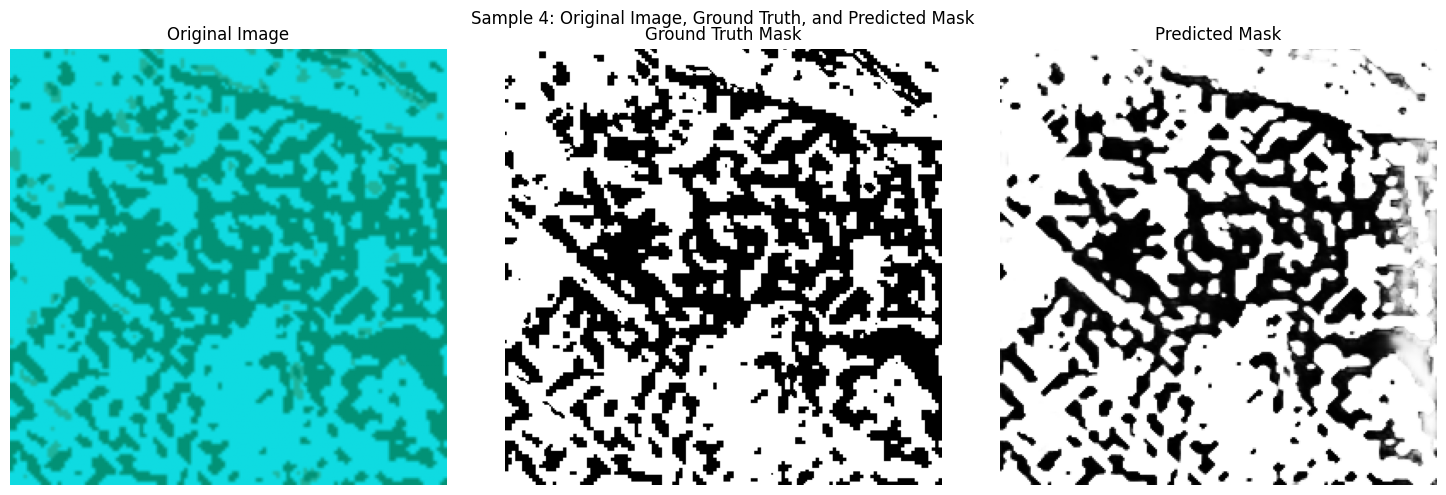

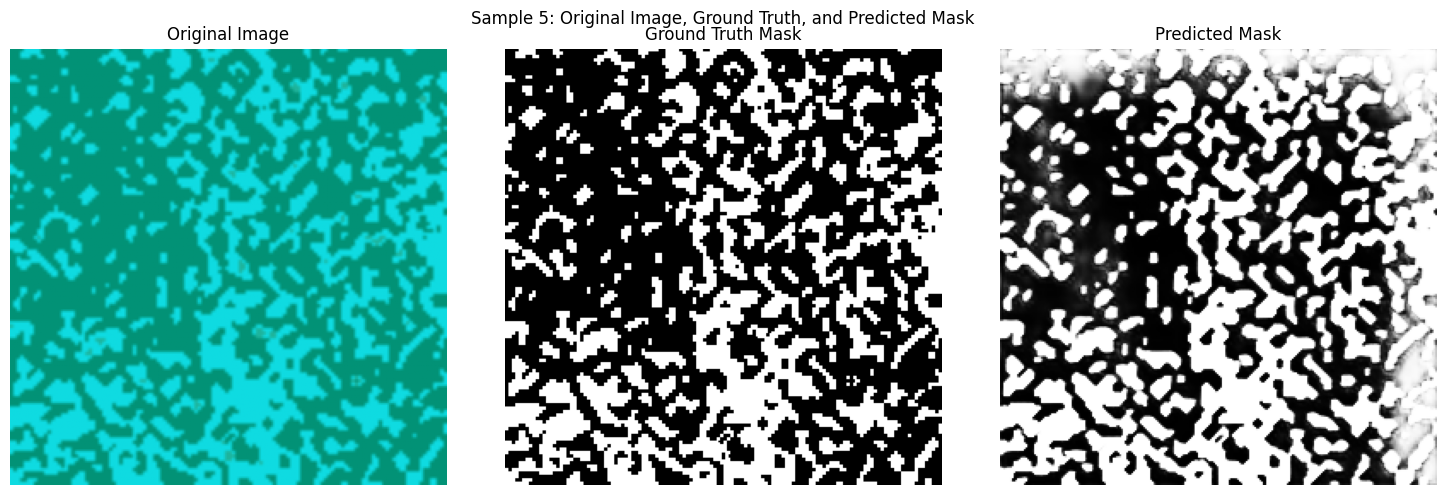

In [ ]:
import matplotlib.pyplot as plt

for i in range(num_samples):
    plt.figure(figsize=(15, 5))

    # Display original image
    plt.subplot(1, 3, 1)
    plt.imshow(sample_images[i])
    plt.title('Original Image')
    plt.axis('off')

    # Display ground truth mask
    plt.subplot(1, 3, 2)
    plt.imshow(sample_ground_truth_masks[i], cmap='gray')
    plt.title('Ground Truth Mask')
    plt.axis('off')

    # Display predicted mask
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_masks[i], cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')

    plt.suptitle(f'Sample {i+1}: Original Image, Ground Truth, and Predicted Mask') # Add overall title

    plt.tight_layout()
    plt.show()

## Summary:

### Data Analysis Key Findings

*   Five random sample images and their corresponding ground truth masks were selected from the validation set.
*   The selected images and masks were loaded, resized to a uniform size, and preprocessed. Images were normalized, and masks were converted to binary format and reshaped.
*   The trained model successfully generated mask predictions for the preprocessed sample images.
*   For each sample, the original image, its ground truth mask, and the model's predicted mask were displayed side-by-side using matplotlib.
*   Titles were added to each subplot (Original Image, Ground Truth Mask, Predicted Mask) and a main title was added to each figure indicating the sample number, enhancing the clarity of the visualizations.

### Insights or Next Steps

*   Review the visualizations to qualitatively assess the model's performance and identify areas where predictions deviate significantly from the ground truth.
*   Quantitatively evaluate the model's performance on the validation set using metrics such as IoU or Dice coefficient to complement the visual inspection.


# Task
Train a U-Net model on the dataset, visualize its predictions, and compare its performance with the previously trained LinkNet model.

## Define u-net model

### Subtask:
Define the architecture of the U-Net model.


**Reasoning**:
Define the U-Net model architecture using the segmentation_models library with the specified input shape and output classes, and print the model summary.



In [ ]:
import segmentation_models as sm

# Define the input shape
input_shape = (IMG_HEIGHT, IMG_WIDTH, 3) # 3 channels for color images

# Define the number of output classes for binary segmentation
n_classes = 1

# Instantiate the U-Net model
unet_model = sm.Unet(input_shape=input_shape, classes=n_classes, activation='sigmoid')

unet_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 256, 256,  │      1,792 │ input_layer_1[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 256, 256,  │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 128, 128,  │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 128, 128,  │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 128, 128,  │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 64, 64,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 64, 64,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 64, 64,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 64, 64,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 32, 32,    │          0 │ block3_conv3[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 32, 32,    │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 32, 32,    │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 32, 32,    │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 16, 16,    │          0 │ block4_conv3[0][… │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv1        │ (None, 16, 16,    │  2,359,808 │ block4_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv2        │ (None, 16, 16,    │  2,359,808 │ block5_conv1[0][

 Total params: 23,752,273 (90.61 MB)

 Trainable params: 23,748,241 (90.59 MB)

 Non-trainable params: 4,032 (15.75 KB)

## Compile the u-net model

### Subtask:
Configure the U-Net model for training by specifying the optimizer, loss function, and metrics.


**Reasoning**:
Configure the U-Net model for training by specifying the optimizer, loss function, and metrics using the imported components and then compile the model.



In [ ]:
from tensorflow.keras.optimizers import Adam
import segmentation_models as sm

# Define optimizer, loss function, and metrics (using the same as LinkNet for consistency)
optimizer = Adam(learning_rate=0.001)
loss = sm.losses.bce_jaccard_loss
metrics = [sm.metrics.iou_score]

# Compile the U-Net model
unet_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

print("U-Net model compiled successfully.")

U-Net model compiled successfully.


## Train the u-net model

### Subtask:
Train the U-Net model using the prepared training data and validate it using the validation data.


**Reasoning**:
Train the compiled U-Net model using the fit method with the training and validation data generators, specifying the number of epochs and storing the training history.



In [ ]:
unet_history = unet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

print("U-Net model training completed.")

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 82s 514ms/step - iou_score: 0.6301 - loss: 0.7580 - val_iou_score: 0.3486 - val_loss: 1.6744
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 43s 485ms/step - iou_score: 0.7845 - loss: 0.4415 - val_iou_score: 0.0700 - val_loss: 4.4282
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 44s 505ms/step - iou_score: 0.7937 - loss: 0.4393 - val_iou_score: 0.7388 - val_loss: 0.7120
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 45s 506ms/step - iou_score: 0.7961 - loss: 0.4360 - val_iou_score: 0.2049 - val_loss: 4.0235
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 42s 481ms/step - iou_score: 0.8238 - loss: 0.3694 - val_iou_score: 0.3894 - val_loss: 1.7325
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 42s 480ms/step - iou_score: 0.8310 - loss: 0.3521 - val_iou_score: 0.7228 - val_loss: 0.7297
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 42s 482ms/step - iou_score: 0.8324 - loss: 0.3554 - val_iou_score: 0.7156 - val_loss: 0.7858
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 42s 481ms/step - iou_score: 0.8436 - loss: 0.

# Task
Visualize the training history and predictions of the trained U-Net model, evaluate its performance on the validation set, and compare it with the LinkNet model.

## Extract u-net history data

### Subtask:
Access the training and validation loss and metric values from the `unet_history` object returned by the `unet_model.fit()` method.


**Reasoning**:
Access the training and validation loss and metric values from the unet_history object and store them in separate variables as instructed.



In [ ]:
# Access training and validation loss for U-Net
unet_train_loss = unet_history.history['loss']
unet_val_loss = unet_history.history['val_loss']

# Access training and validation IoU score for U-Net
unet_train_iou = unet_history.history['iou_score']
unet_val_iou = unet_history.history['val_iou_score']

print("U-Net training and validation metrics accessed from history.")

U-Net training and validation metrics accessed from history.


## Plot u-net training history

### Subtask:
Use a plotting library (e.g., Matplotlib) to create plots showing the U-Net training and validation loss over epochs, and the training and validation metric (IoU score) over epochs.


**Reasoning**:
Plot the training and validation loss and IoU scores over epochs for the U-Net model using matplotlib, adding titles and labels for clarity.



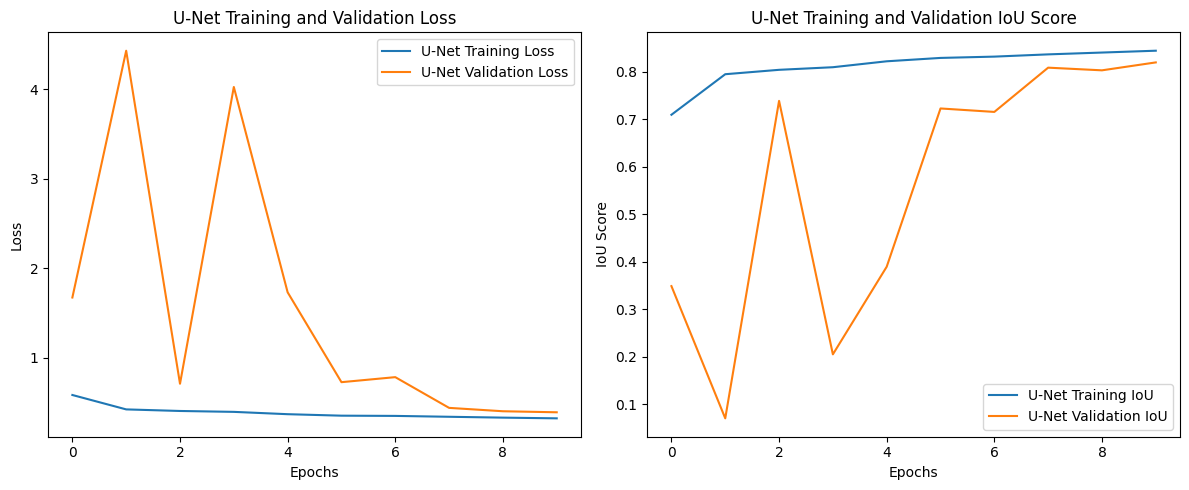

In [ ]:
import matplotlib.pyplot as plt

epochs_range = range(epochs)

plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, unet_train_loss, label='U-Net Training Loss')
plt.plot(epochs_range, unet_val_loss, label='U-Net Validation Loss')
plt.title('U-Net Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation IoU score
plt.subplot(1, 2, 2)
plt.plot(epochs_range, unet_train_iou, label='U-Net Training IoU')
plt.plot(epochs_range, unet_val_iou, label='U-Net Validation IoU')
plt.title('U-Net Training and Validation IoU Score')
plt.xlabel('Epochs')
plt.ylabel('IoU Score')
plt.legend()

plt.tight_layout()
plt.show()

## Add labels and title to u-net plots

### Subtask:
Add appropriate labels to the x and y axes and a title to each U-Net plot for clarity.


## Get u-net model predictions

### Subtask:
Use the trained U-Net model to predict the mask for each selected sample image from the validation set (reusing the previously selected samples).


**Reasoning**:
Predict the masks for the sample images using the trained U-Net model and squeeze the output.



In [ ]:
# Use the trained U-Net model to predict the masks
unet_predicted_masks = unet_model.predict(sample_images_array)

# Squeeze the predicted masks to remove the extra dimension
unet_predicted_masks = np.squeeze(unet_predicted_masks, axis=-1)

print(f"Generated U-Net predictions for {len(sample_images)} sample images.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Generated U-Net predictions for 5 sample images.


**Reasoning**:
Display the original image, the ground truth mask, and the predicted mask from the U-Net model for each sample side by side.



In [ ]:
import matplotlib.pyplot as plt

for i in range(num_samples):
    plt.figure(figsize=(18, 6))

    # Display original image
    plt.subplot(1, 3, 1)
    plt.imshow(sample_images[i])
    plt.title('Original Image')
    plt.axis('off')

    # Display ground truth mask
    plt.subplot(1, 3, 2)
    plt.imshow(sample_ground_truth_masks[i], cmap='gray')
    plt.title('Ground Truth Mask')
    plt.axis('off')

    # Display U-Net predicted mask
    plt.subplot(1, 3, 3)
    plt.imshow(unet_predicted_masks[i], cmap='gray')
    plt.title('U-Net Predicted Mask')
    plt.axis('off')

    plt.suptitle(f'Sample {i+1}: Original Image, Ground Truth, and U-Net Predicted Mask') # Add overall title

    plt.tight_layout()
    plt.show()

## Add titles and labels to u-net visualizations

### Subtask:
Add titles and labels to the U-Net visualizations.


**Reasoning**:
Add appropriate titles to each image and the overall plot for clarity.



In [ ]:
import matplotlib.pyplot as plt

for i in range(num_samples):
    plt.figure(figsize=(15, 5))

    # Display original image
    plt.subplot(1, 3, 1)
    plt.imshow(sample_images[i])
    plt.title('Original Image')
    plt.axis('off')

    # Display ground truth mask
    plt.subplot(1, 3, 2)
    plt.imshow(sample_ground_truth_masks[i], cmap='gray')
    plt.title('Ground Truth Mask')
    plt.axis('off')

    # Display predicted mask (using the LinkNet predictions from before)
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_masks[i], cmap='gray')
    plt.title('LinkNet Predicted Mask')
    plt.axis('off')

    plt.suptitle(f'Sample {i+1}: Original Image, Ground Truth, and LinkNet Predicted Mask') # Add overall title

    plt.tight_layout()
    plt.show()

for i in range(num_samples):
    plt.figure(figsize=(15, 5))

    # Display original image
    plt.subplot(1, 3, 1)
    plt.imshow(sample_images[i])
    plt.title('Original Image')
    plt.axis('off')

    # Display ground truth mask
    plt.subplot(1, 3, 2)
    plt.imshow(sample_ground_truth_masks[i], cmap='gray')
    plt.title('Ground Truth Mask')
    plt.axis('off')

    # Display U-Net predicted mask
    plt.subplot(1, 3, 3)
    plt.imshow(unet_predicted_masks[i], cmap='gray')
    plt.title('U-Net Predicted Mask')
    plt.axis('off')

    plt.suptitle(f'Sample {i+1}: Original Image, Ground Truth, and U-Net Predicted Mask') # Add overall title

    plt.tight_layout()
    plt.show()

## Evaluate the u-net model

### Subtask:
Evaluate the trained U-Net model on the validation set using metrics like IoU score.


**Reasoning**:
Evaluate the trained U-Net model on the validation set using the evaluate method and print the results.



In [ ]:
# Evaluate the U-Net model on the validation set
unet_evaluation_results = unet_model.evaluate(val_generator)

# Print the evaluation results
print("U-Net Model Evaluation Results on Validation Set:")
print(f"  Loss: {unet_evaluation_results[0]:.4f}")
print(f"  IoU Score: {unet_evaluation_results[1]:.4f}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - iou_score: 0.8000 - loss: 0.4196
U-Net Model Evaluation Results on Validation Set:
  Loss: 0.3942
  IoU Score: 0.8188


## Compare model performance

### Subtask:
Compare the performance of the U-Net model with the LinkNet model based on the evaluation metrics.


**Reasoning**:
Access the LinkNet evaluation results from the history object, compare them with the U-Net evaluation results, and print a summary of the comparison.



In [ ]:
# Access the last validation loss and IoU from LinkNet history
linknet_val_loss = history.history['val_loss'][-1]
linknet_val_iou = history.history['val_iou_score'][-1]

# Get U-Net validation loss and IoU from evaluation results
unet_val_loss = unet_evaluation_results[0]
unet_val_iou = unet_evaluation_results[1]

# Print comparison summary
print("Model Performance Comparison on Validation Set:")
print("-" * 40)
print(f"{'Metric':<15} | {'LinkNet':<10} | {'U-Net':<10}")
print("-" * 40)
print(f"{'Validation Loss':<15} | {linknet_val_loss:<10.4f} | {unet_val_loss:<10.4f}")
print(f"{'Validation IoU':<15} | {linknet_val_iou:<10.4f} | {unet_val_iou:<10.4f}")
print("-" * 40)

if unet_val_iou > linknet_val_iou:
    print("The U-Net model achieved a higher validation IoU score.")
elif unet_val_iou < linknet_val_iou:
    print("The LinkNet model achieved a higher validation IoU score.")
else:
    print("Both models achieved a similar validation IoU score.")

if unet_val_loss < linknet_val_loss:
    print("The U-Net model achieved a lower validation loss.")
elif unet_val_loss > linknet_val_loss:
    print("The LinkNet model achieved a lower validation loss.")
else:
    print("Both models achieved a similar validation loss.")

Model Performance Comparison on Validation Set:
----------------------------------------
Metric          | LinkNet    | U-Net     
----------------------------------------
Validation Loss | 0.9475     | 0.3942    
Validation IoU  | 0.7453     | 0.8188    
----------------------------------------
The U-Net model achieved a higher validation IoU score.
The U-Net model achieved a lower validation loss.


## Implement Bagging Ensemble

### Subtask:
Implement the bagging ensemble strategy by creating bootstrapped datasets, training multiple models, and combining their predictions.

**Reasoning**:
Implement the bagging ensemble by creating bootstrapped datasets using `sklearn.utils.resample`, training multiple models (e.g., a mix of LinkNet and U-Net) on these datasets, and defining a function to average their predictions.

In [ ]:
from sklearn.utils import resample
import numpy as np
import tensorflow as tf

# Define the number of models for the bagging ensemble
n_estimators = 5

# Create empty lists to store the bagged models
bagged_models = []

# Get the list of all image and mask paths from the training set
all_train_image_paths = list(train_image_paths)
all_train_mask_paths = list(train_mask_paths)

# Combine image and mask paths for easier bootstrapping
combined_train_paths = list(zip(all_train_image_paths, all_train_mask_paths))

print(f"Creating {n_estimators} bagged models...")

for i in range(n_estimators):
    print(f"Training Bagging Model {i+1}/{n_estimators}...")

    # Create a bootstrapped sample of the training data
    bootstrapped_paths = resample(combined_train_paths, replace=True, n_samples=len(combined_train_paths), random_state=i)

    # Separate the bootstrapped image and mask paths
    bootstrapped_image_paths, bootstrapped_mask_paths = zip(*bootstrapped_paths)

    # Create a new data generator for the bootstrapped data
    bootstrapped_train_generator = ImageMaskGenerator(
        list(bootstrapped_image_paths),
        list(bootstrapped_mask_paths),
        batch_size,
        IMG_HEIGHT,
        IMG_WIDTH
    )

    # Choose a model type (e.g., alternate between LinkNet and U-Net)
    if i % 2 == 0:
        print("  Using LinkNet model.")
        # Re-instantiate and compile LinkNet model for each bag to avoid weight sharing
        bag_model = sm.Linknet(input_shape=input_shape, classes=n_classes, activation='sigmoid')
        bag_model.compile(optimizer=Adam(learning_rate=0.001), loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score])
    else:
        print("  Using U-Net model.")
        # Re-instantiate and compile U-Net model for each bag
        bag_model = sm.Unet(input_shape=input_shape, classes=n_classes, activation='sigmoid')
        bag_model.compile(optimizer=Adam(learning_rate=0.001), loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score])


    # Train the model on the bootstrapped data
    bag_model.fit(
        bootstrapped_train_generator,
        epochs=epochs, # Use the same number of epochs as individual models
        verbose=0 # Suppress detailed output for each bag
    )

    # Add the trained model to the list
    bagged_models.append(bag_model)

print("\nBagging ensemble training completed.")

# Function to combine predictions from bagged models
def ensemble_predict_bagging(images, models):
    """Averages predictions from a list of models."""
    predictions = [model.predict(images) for model in models]
    avg_predictions = np.mean(predictions, axis=0)
    return avg_predictions

print("Bagging ensemble implementation complete. Ready to predict and evaluate.")

Creating 5 bagged models...
Training Bagging Model 1/5...
  Using LinkNet model.
Training Bagging Model 2/5...
  Using U-Net model.
Training Bagging Model 3/5...
  Using LinkNet model.
Training Bagging Model 4/5...
  Using U-Net model.
Training Bagging Model 5/5...
  Using LinkNet model.

Bagging ensemble training completed.
Bagging ensemble implementation complete. Ready to predict and evaluate.


In [ ]:
# Get predictions from the bagging ensemble on the validation set
ensemble_predicted_masks = ensemble_predict_bagging(sample_images_array, bagged_models)

# Evaluate the ensemble model on the validation set (using IoU score as the metric)
# Since we have the ground truth masks for the validation set, we can calculate the IoU score manually
from tensorflow.keras.metrics import MeanIoU

# Convert predicted masks to binary (threshold at 0.5)
ensemble_predicted_masks_binary = (ensemble_predicted_masks > 0.5).astype(np.float32)

# Flatten the masks for MeanIoU calculation
ground_truth_masks_flat = sample_ground_truth_masks_array.flatten()
predicted_masks_flat = ensemble_predicted_masks_binary.flatten()

# Calculate Mean IoU
iou_metric = MeanIoU(num_classes=2) # Binary classification (mask/no mask)
iou_metric.update_state(ground_truth_masks_flat, predicted_masks_flat)
ensemble_iou_score = iou_metric.result().numpy()


print("Bagging Ensemble Model Evaluation Results on Sample Validation Set:")
print(f"  IoU Score: {ensemble_iou_score:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Bagging Ensemble Model Evaluation Results on Sample Validation Set:
  IoU Score: 0.6105
